In [48]:
import pandas as pd
feature_name_df = pd.read_csv("./datasets/UCI HAR Dataset/features.txt", \
    sep='\s+', header=None, names=['column_index', 'column_name'])

feature_name = feature_name_df.iloc[:,1].values.tolist()

In [49]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [50]:
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [51]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df

,column_index
column_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [52]:
feature_dup_df[feature_dup_df['column_index'] > 1]

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [53]:
feature_dup_df[feature_dup_df['column_index'] > 1].count()

column_index    42
dtype: int64

In [54]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'-'+str(x[1])
                                                                                                            if x[1] > 0 else x[0], axis=1)
    
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [55]:
# import pandas as pd
# def get_human_dataset():
#     feature_name_df = pd.read_csv("./datasets/UCI HAR Dataset/features.txt", \
#     sep='\s+', header=None, names=['column_index', 'column_name'])
    
#     new_feature_name_df = get_new_feature_name_df(feature_name_df)
#     feature_name = feature_name_df.iloc[:,1].values.tolist()

#     X_train = pd.read_csv("./datasets/UCI HAR Dataset/train/X_train.txt", \
#     sep='\s+', names=['feature_name'])
#     X_test = pd.read_csv("./datasets/UCI HAR Dataset/test/X_test.txt", \
#     sep='\s+', names=['feature_name'])

#     y_train = pd.read_csv("./datasets/UCI HAR Dataset/train/y_train.txt", \
#     sep='\s+', header=None, names=['action'])
#     y_test = pd.read_csv("./datasets/UCI HAR Dataset/test/y_test.txt", \
#     sep='\s+', header=None, names=['action'])

#     return X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = get_human_dataset()

In [56]:
def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv('./datasets/UCI HAR Dataset/features.txt', sep='\s+',
                                                     header=None, names=['column_index', 'column_name'])
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 반환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 데이터프레임으로 로딩
    # 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./datasets/UCI HAR Dataset/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./datasets/UCI HAR Dataset/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 데이터 프레임으로 로딩, 컬럼명은 action으로 부여
    y_train = pd.read_csv('./datasets/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./datasets/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 데이터프레임을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=156)

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8547675602307431

In [59]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [62]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [6,8,10,12,16,20,24], 'min_samples_split' : [16,24]}
grid_cv = GridSearchCV(dt_clf, param_grid=parameters,\
     cv = 5, scoring='accuracy', verbose=1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_estimator_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)
{'max_depth': 8, 'min_samples_split': 16}


In [63]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.565165,0.965922,0.014192,0.002315,6,16,"{'max_depth': 6, 'min_samples_split': 16}",0.813732,0.868117,0.819728,0.866667,0.870068,0.847662,0.025350,10
1,3.542973,0.319055,0.022187,0.013399,6,24,"{'max_depth': 6, 'min_samples_split': 24}",0.808973,0.868117,0.819728,0.865986,0.870068,0.846575,0.026561,12
2,6.265277,1.470335,0.018795,0.006877,8,16,"{'max_depth': 8, 'min_samples_split': 16}",0.806254,0.830048,0.860544,0.874830,0.902721,0.854879,0.033764,1
3,3.898249,0.269186,0.016590,0.003383,8,24,"{'max_depth': 8, 'min_samples_split': 24}",0.806934,0.830048,0.857143,0.872109,0.890476,0.851342,0.029739,4
4,4.663733,0.209661,0.015593,0.002244,10,16,"{'max_depth': 10, 'min_samples_split': 16}",0.804895,0.816451,0.866667,0.884354,0.891156,0.852705,0.035427,3
5,4.643557,0.117786,0.015196,0.002136,10,24,"{'max_depth': 10, 'min_samples_split': 24}",0.810333,0.819171,0.869388,0.881633,0.889796,0.854064,0.032868,2
6,5.307162,0.888453,0.016196,0.003426,12,16,"{'max_depth': 12, 'min_samples_split': 16}",0.798097,0.810333,0.851020,0.884354,0.885034,0.845768,0.036295,14
7,5.897017,1.491474,0.015193,0.000974,12,24,"{'max_depth': 12, 'min_samples_split': 24}",0.791298,0.819850,0.855782,0.880952,0.882993,0.846175,0.035670,13
8,6.129266,1.073603,0.015789,0.002036,16,16,"{'max_depth': 16, 'min_samples_split': 16}",0.800816,0.815092,0.858503,0.876871,0.884354,0.847127,0.033379,11
9,9.031575,4.022985,0.034784,0.040622,16,24,"{'max_depth': 16, 'min_samples_split': 24}",0.805574,0.820530,0.854422,0.878231,0.888435,0.849439,0.032045,5


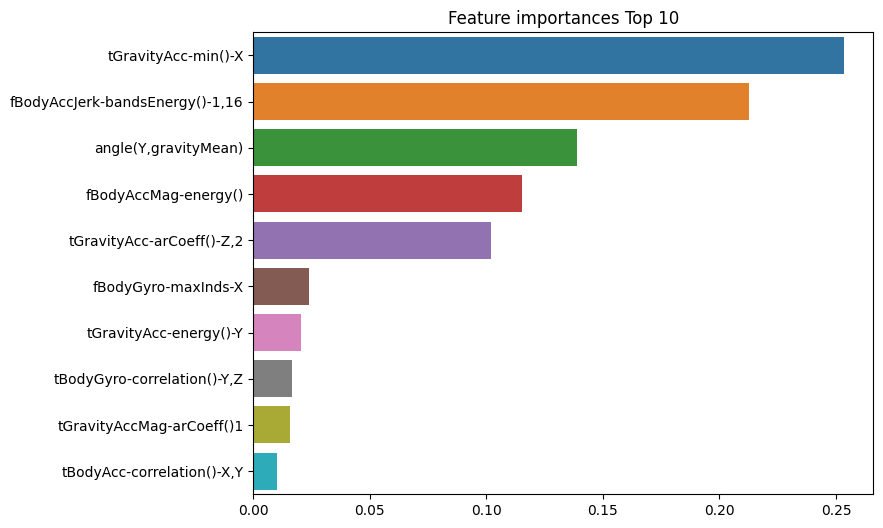

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

best_df_clf = grid_cv.best_estimator_
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y= ftr_top10.index)
plt.show()